# TRABALHO FINAL DE INTELIGÊNCIA ARTIFICIAL : RNA vs. RANDOM FLOREST

##### Este conjunto de dados contém informações sobre os salários dos funcionários de uma empresa. Cada linha representa um funcionário diferente, e as colunas incluem informações como idade, gênero, nível de educação, cargo, anos de experiência e salário.

### Colunas:

- Idade: Esta coluna representa a idade de cada funcionário em anos. Os valores nesta coluna são numéricos.

- Gênero: Esta coluna contém o gênero de cada funcionário, que pode ser masculino ou feminino. Os valores nesta coluna são categóricos.

- Nível de Educação: Esta coluna contém o nível educacional de cada funcionário, que pode ser ensino médio, graduação, mestrado ou doutorado. Os valores nesta coluna são categóricos.

- Cargo: Esta coluna contém o cargo de cada funcionário. Os cargos podem variar dependendo da empresa e podem incluir posições como gerente, analista, engenheiro ou administrador. Os valores nesta coluna são categóricos.

- Anos de Experiência: Esta coluna representa o número de anos de experiência de trabalho de cada funcionário. Os valores nesta coluna são numéricos.

- Salário: Esta coluna representa o salário anual de cada funcionário em dólares americanos. Os valores nesta coluna são numéricos e podem variar dependendo de fatores como cargo, anos de experiência e nível de educação.

### Importando Bibliotecas

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando bibliotecas do Sklearn para pré-processamento, modelagem e avaliação
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Importando bibliotecas do Keras para construção e treinamento da rede neural
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

### Leitura do Dataset

In [250]:
ds = pd.read_csv("./Salary Data.csv")

print("Estatísticas descritivas do dataset:")
print(ds.describe())
print("\nDados ausentes por coluna:")
print(ds.isnull().sum())

Estatísticas descritivas do dataset:
              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000

Dados ausentes por coluna:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


### Tratamento dos dados

Como podemos ver no arquivo ```Salary Data.csv``` as colunas **Gender**, **Education Level** e **Job Title** precisam ser tratadas pois são `strings`


In [251]:
ds['Gender'] = LabelEncoder().fit_transform(ds['Gender']) 
ds['Education Level'] = LabelEncoder().fit_transform(ds['Education Level'])
ds['Job Title'] = LabelEncoder().fit_transform(ds['Job Title'])

### Separando varáveis independentes e dependentes

As variáveis de **Age**, **Gender**, **Education Level**, **Job Title**, **Years of Experience** serão usadas como `X` (entrada) já **Salary** será a saída esperada `Y`.

Além disso com o uso do método `trains_test_split()` iremos separa o conjunto de dados de forma aleatória para o treino e teste.


In [252]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

# Fazendo a normalização das variaveis independentes
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.reshape(-1, 1)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Treinamento do Modelo de Rede Neural Artificial

In [253]:
# Modelo de Rede Neural (ANN)


ann = Sequential()
ann.add(Dense(units=128, activation='relu')) 
ann.add(Dense(units=64, activation='relu'))  
ann.add(Dense(units=1, activation='linear')) 

optimizer = Adam(learning_rate=0.001)
ann.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)


ann.fit(X_train, y_train, validation_split=0.1, epochs=100)



Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.8343 - val_loss: 0.5002
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2610 - val_loss: 0.1716
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1203 - val_loss: 0.1465
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1296 - val_loss: 0.1413
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0926 - val_loss: 0.1198
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0891 - val_loss: 0.1264
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0970 - val_loss: 0.1252
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0768 - val_loss: 0.1206
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0729 - val_loss: 0.1137
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0684 - val_loss: 0.1105
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0645 - val_loss: 0.1080
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0783 - val_loss: 0.1040
E

### Treinamento do Random Forest

In [254]:
# Modelo de Random Forest

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=0)

## Avaliação dos modelos

- **R² (Coeficiente de Determinação):** Mede a proporção da variabilidade explicada pelo modelo, similar ao score.
- **Erro Médio Absoluto (MAE):** Média dos erros absolutos.
- **Erro Quadrático Médio (MSE):** Penaliza erros maiores de forma mais significativa.

In [255]:
# Previsões e Avaliação dos Modelos

# Previsão dos salários no conjunto de teste utilizando a rede neural
y_pred_ann = ann.predict(X_test)

# Reversão da normalização para obter os valores reais de salário
y_pred_ann = scaler.inverse_transform(y_pred_ann)
y_test_real = scaler.inverse_transform(y_test)

print(f"\nDesempenho da Rede Neural Artificial:")
print(f"R²/Score: {r2_score(y_test_real, y_pred_ann):.2f}")
print(f"MAE: {mean_absolute_error(y_test_real, y_pred_ann):.2f}")
print(f"MSE: {mean_squared_error(y_test_real, y_pred_ann):.2f}")

# Previsão dos salários no conjunto de teste utilizando o Random Forest
y_pred_rf = rf.predict(X_test)

# Redimensionamento e reversão da normalização
y_pred_rf = y_pred_rf.reshape(-1, 1)
y_pred_rf = scaler.inverse_transform(y_pred_rf)

y_pred_ann = y_pred_ann.flatten()
y_pred_rf = y_pred_rf.flatten()
y_test_real = y_test_real.flatten()

print(f"\nDesempenho da Random Forest:")
print(f"R²/Score: {r2_score(y_test_real, y_pred_rf):.2f}")
print(f"MAE: {mean_absolute_error(y_test_real, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test_real, y_pred_rf):.2f}")

errors_ann = np.abs(y_test_real - y_pred_ann)
errors_rf = np.abs(y_test_real - y_pred_rf)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step

Desempenho da Rede Neural Artificial:
R²/Score: 0.93
MAE: 8030.97
MSE: 138618894.51

Desempenho da Random Forest:
R²/Score: 0.92
MAE: 8072.55
MSE: 159284881.91


## Visualização Gráfica


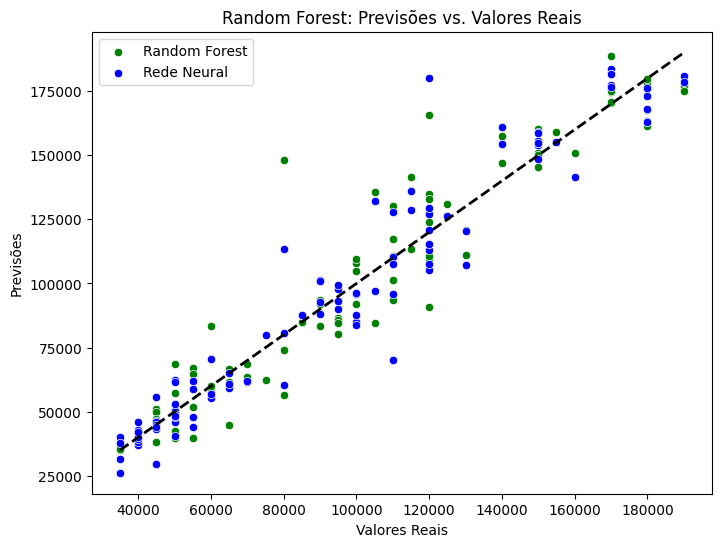

In [256]:
# Gráfico de Dispersão das Previsões vs. Valores Reais para o Random Forest
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_real.flatten(), y=y_pred_rf.flatten(), color='green', label='Random Forest')
sns.scatterplot(x=y_test_real.flatten(), y=y_pred_ann.flatten(), color='blue', label='Rede Neural')
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Random Forest: Previsões vs. Valores Reais')

plt.show()


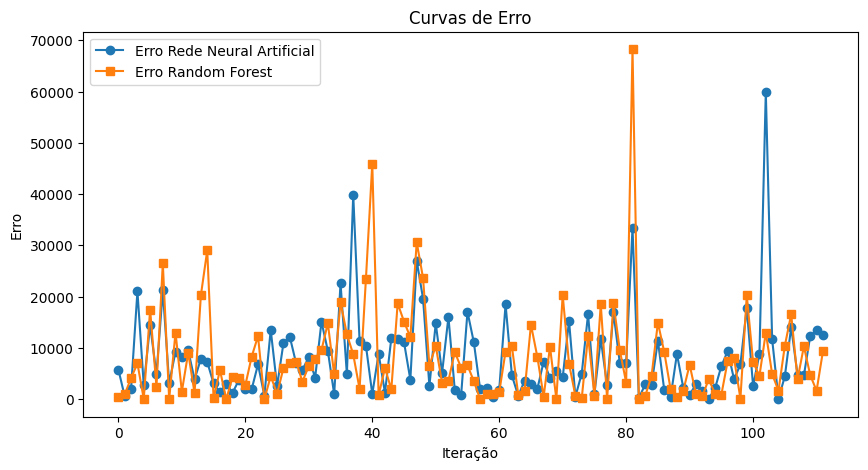

In [257]:
plt.figure(figsize=(10, 5))
plt.plot(errors_ann, label='Erro Rede Neural Artificial', marker='o')
plt.plot(errors_rf, label='Erro Random Forest', marker='s')
plt.title("Curvas de Erro")
plt.xlabel("Iteração")
plt.ylabel("Erro")
plt.legend()
plt.show()

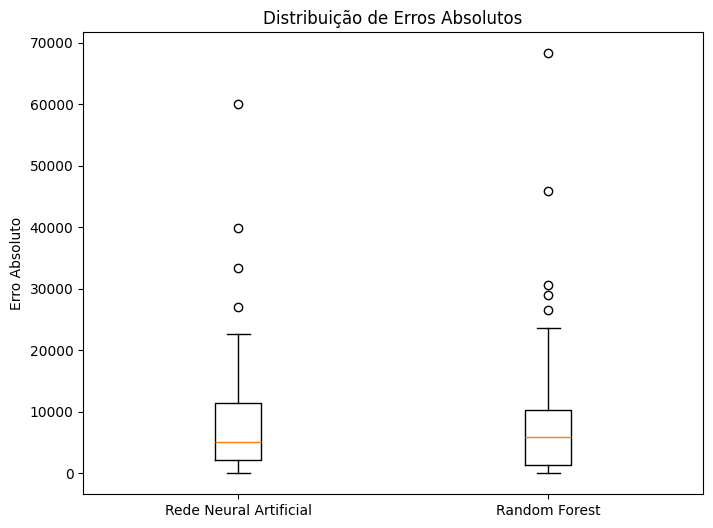

In [258]:
plt.figure(figsize=(8, 6))
data = [errors_ann, errors_rf]
plt.boxplot(data, tick_labels=['Rede Neural Artificial', 'Random Forest'])
plt.title("Distribuição de Erros Absolutos")
plt.ylabel("Erro Absoluto")
plt.show()

## Comparação com o trabalho 1



Desempenho do KNN:
R²/Score: 0.92
MAE: 8585.54
MSE: 164291512.50

Desempenho da Árvore de Decisão:
R²/Score: 0.93
MAE: 7991.07
MSE: 150669642.86

Desempenho da Rede Neural Artificial:
R²/Score: 0.93
MAE: 8030.97
MSE: 138618894.51

Desempenho da Random Forest:
R²/Score: 0.92
MAE: 8072.55
MSE: 159284881.91


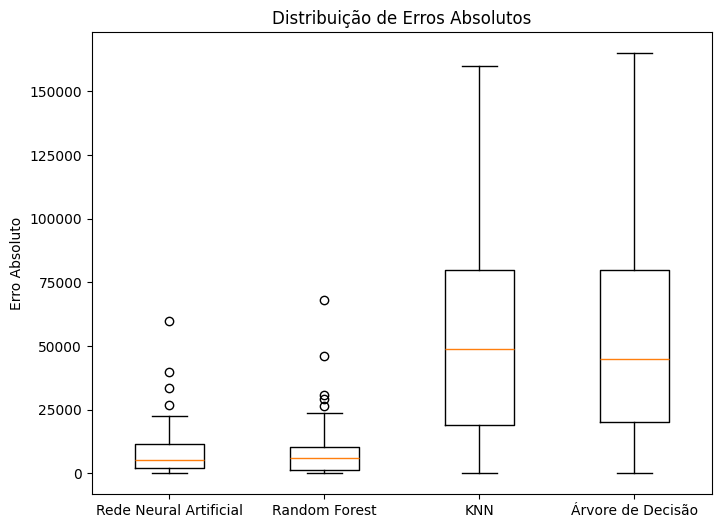

In [259]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

decision_tree = DecisionTreeRegressor(criterion='friedman_mse')
decision_tree.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)
knn_predictions_scaled = scaler.inverse_transform(knn_predictions)

print(f"\nDesempenho do KNN:")
print(f"R²/Score: {r2_score(y_test_real, knn_predictions_scaled):.2f}")
print(f"MAE: {mean_absolute_error(y_test_real, knn_predictions_scaled):.2f}")
print(f"MSE: {mean_squared_error(y_test_real, knn_predictions_scaled):.2f}")


decision_tree_predictions = decision_tree.predict(X_test)
decision_tree_predictions_scaled = scaler.inverse_transform(decision_tree_predictions.reshape(-1, 1))

print(f"\nDesempenho da Árvore de Decisão:")
print(f"R²/Score: {r2_score(y_test_real, decision_tree_predictions_scaled):.2f}")
print(f"MAE: {mean_absolute_error(y_test_real, decision_tree_predictions_scaled):.2f}")
print(f"MSE: {mean_squared_error(y_test_real, decision_tree_predictions_scaled):.2f}")


# MODELOS ATUAIS 
print(f"\nDesempenho da Rede Neural Artificial:")
print(f"R²/Score: {r2_score(y_test_real, y_pred_ann):.2f}")
print(f"MAE: {mean_absolute_error(y_test_real, y_pred_ann):.2f}")
print(f"MSE: {mean_squared_error(y_test_real, y_pred_ann):.2f}")
print(f"\nDesempenho da Random Forest:")
print(f"R²/Score: {r2_score(y_test_real, y_pred_rf):.2f}")
print(f"MAE: {mean_absolute_error(y_test_real, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test_real, y_pred_rf):.2f}")



errors_knn = np.abs(y_test_real - knn_predictions_scaled).flatten()
errors_tree = np.abs(y_test_real - decision_tree_predictions_scaled).flatten()


plt.figure(figsize=(8, 6))
data = [errors_ann, errors_rf, errors_knn, errors_tree]
plt.boxplot(data, tick_labels=['Rede Neural Artificial', 'Random Forest', 'KNN', 'Árvore de Decisão'])
plt.title("Distribuição de Erros Absolutos")
plt.ylabel("Erro Absoluto")
plt.show()